# SMD-Übungszettel Nr. 5

Abgabe von: __Pape, Kusurmann und Becker__

In [228]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import collections

np.random.seed(8)

## Aufgabe 13

### Aufgabenteil a)

$$
\Phi = \Phi_0 \left(\frac{E}{A}\right)^{-\gamma} \quad A=\mathrm{TeV}
$$
Bestimme zunächst die Transformationsformel.
Zunächst die Normierung $\Phi_0$:

$$\begin{aligned} 
1&=\int_{E_0}^{\infty} \Phi \, \mathrm{d}E\\
&=\frac{\Phi_0}{A^{-\gamma}(\gamma+1)}E_0^{-\gamma+1} \quad A=\mathrm{TeV}\\
\Leftrightarrow \quad \Phi_0&=(\gamma+E_0^{\gamma-1}
\end{aligned}$$

Nun die Transformationsformel $T(u)$:

$$\begin{aligned}
F(E)&=\int_{E_0}^{E} \Phi \, \mathrm{d}E' \\
&=\frac{-\Phi_0}{A^{-\gamma}(\gamma+1)}\left( E^{-\gamma+1} - E_0^{-\gamma+1}\right) \overset{!}{=}u\\
\Leftrightarrow \quad T(u)=E&=\left(-\frac{A^{-\gamma}(\gamma+1)}{\Phi_0}u + E_0^{-\gamma+1}\right)^{\frac{1}{1-\gamma}} \overset{A=1}{=} \left((-u+1)E_0^{-\gamma + 1}\right)^{\frac{1}{1-\gamma}}
\end{aligned}$$

In [90]:
def transformation(random_number, gamma, E_0, A=1):
    return ( (-random_number + 1) * E_0 ** (-gamma +1))**(1/(1-gamma))

In [92]:
uniform_random = np.random.uniform(size=int(1e5))
gamma = 2.7
E_0 =  1

random_flux = transformation(uniform_random, gamma, E_0)

Darstellung der erstellten Zufalsszahlen in einem Histogramm:

Text(0,0.5,'P')

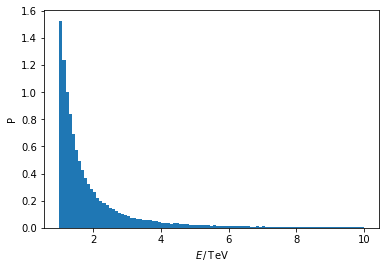

In [93]:
plt.hist(random_flux, density=True, bins=np.linspace(1, 10, 100));
plt.xlabel(r'$E\,/\,\mathrm{TeV}$')
plt.ylabel('P')

Komischer Weise ist $p>1$.

Abspeichern in Dataframe.

In [114]:
df = pd.DataFrame(data={'Energy':random_flux})

### Aufgabenteil b)

In [99]:
def detector_probability(E):
    return (1 - np.exp(-E/2))**3

In [130]:
yrandom = np.random.uniform(0, 1, int(1e5))

df['AcceptanceMask']=(yrandom<detector_probability(random_flux))

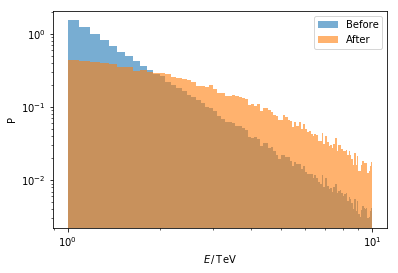

In [144]:
plt.hist(random_flux, density=True, bins=np.linspace(1, 10, 100), alpha=0.6, label='Before');

plt.hist(random_flux[df['AcceptanceMask'].values], density=True,
         bins=np.linspace(1, 10, 100), alpha=0.6, label='After')

plt.xlabel(r'$E\,/\,\mathrm{TeV}$')
plt.ylabel('P')
plt.legend()
plt.xscale('log')
plt.yscale('log')

Deutlich zuerkennen ist das größere Energien besser berücksichtigt werden bzw. eher gemessen werden, als kleine Energien.

### Aufgabenteil c)

In [195]:
def hits(E):
    hits = np.random.normal(10 * E, 2 * E)
    if len(hits[hits<0] != 0):
        print('Jop')
    else:
        return hits.astype('int')

Noch keine Auffüllfunktion geschrieben.

In [196]:
df['NumberOfHits']=hits(random_flux)

### Aufgabenteil d)

In [201]:
def sigma_position(hits):
    return 1 / np.log10( hits + 1)

In [210]:
mu_x = 7
mu_y = 3

x_position = np.random.normal(mu_x, sigma_position(df['NumberOfHits'].values))
y_position = np.random.normal(mu_y, sigma_position(df['NumberOfHits'].values))

In [211]:
df['x'] = x_position
df['y'] = y_position

### Aufgabenteil e)

In [215]:
def hits_noise(number, mu, sigma):
    return 10 * np.exp(np.random.normal(mu, sigma, number))

In [216]:
mu_hits_noise = 2
sigma_hits_noise = 1

hits_noise = hits_noise(int(1e7), mu_hits_noise, sigma_hits_noise)

In [226]:
def xy_position_noise(number, xmu, ymu, sigma, rho):
    x = np.random.normal(xmu, sigma, number)
    y = np.random.normal(ymu, sigma, number)
    
    x_star = np.sqrt(1 - rho**2) * sigma * x + rho * sigma * y + xmu
    y_star = sigma * y + ymu
    
    return x_star, y_star

In [229]:
sigma_position_noise = 3
rho = 0.5

x_noise, y_noise = xy_position_noise(int(1e7), mu_x, 
                                     mu_y, sigma_position_noise, rho)

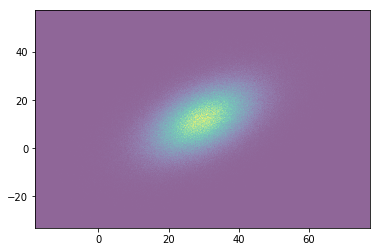

In [248]:
plt.hist2d(x_noise, y_noise, bins=1000, alpha=0.6);

#plt.hist2d(x_position, y_position, bins=1000, alpha=0.6);